<a href="https://colab.research.google.com/github/snfruby/CS114.K21/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('http://cs.uit.edu.vn/data2.txt', names = ['size', 'time'])
print(data.head())
data.shape

      size      time
0  6083695  0.521842
1  1954367  0.152648
2  3734185  0.298548
3  5839301  0.460480
4  6343427  0.527977


(71115, 2)

Lấy dữ liệu xuống bằng cách import thư viện pandas để đọc data dạng URL


In [3]:
from sklearn.model_selection import train_test_split
X=data['size']
y=data['time']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = X_train.values.reshape(-1,1)
X_valid = X_valid.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_valid = y_valid.values.reshape(-1,1)
print(X_train.shape, y_train.shape)

(56892, 1) (56892, 1)


Đưa cột 'size' làm feature , cột 'time' làm label

phân chia dữ liệu train và valid với tỉ lệ 8/2

Reshape lại dữ liệu vì lúc này feature ở dạng array 1 chiều , mà Train test split chỉ chấp nhận dữ liệu 2 chiều.

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
val_pre = model.predict(X_valid)
val_mae = mean_absolute_error(val_pre, y_valid)
print("Mean absolute error:", val_mae)

Mean absolute error: 0.00831551754510758


Khảo sát với thuật toán Linear regression và kiểm tra model bằng sai số tuyệt đối ( mean absolute error )

In [5]:
LR_model = LinearRegression()
LR_model.fit(X_train , y_train)
val_pred_1 = LR_model.predict(X_valid)
print (mean_absolute_error(val_pred_1 , y_valid))
new_data = {'input size':[5839301] }
data_convert_2=pd.DataFrame.from_dict(new_data) 
print (LR_model.predict(data_convert_2))

0.00831551754510758
[[0.47783484]]


Tạo 1 biến dữ liệu mới đưa vào model để train và thực hiện dự đoán
Khả năng dự đoán của model là tốt bởi vì khi đưa 1 dữ liệu trong tập train vào dự đoán thì kết quả xấp xỉ gần như bằng với kết quả của dataset.

In [13]:
data2 = pd.read_csv('http://cs.uit.edu.vn/data3.txt', names = ['size', 'time'])
data2.head()

,size,time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831


In [0]:
from sklearn.model_selection import train_test_split
X_valid_2 = data2['size']
y_valid_2 = data2['time']
X_valid_2 = X_valid_2.values.reshape(-1,1)
y_valid_2 = y_valid_2.values.reshape(-1,1)

In [17]:
val_pre = model.predict(X_valid_2)
val_mae = mean_absolute_error(val_pre, y_valid_2)
print("Mean absolute error:", val_mae)

Mean absolute error: 0.12275577157511128


Kết quả tệ hơn. Trường hợp xấu nhất là bị overfitting

In [18]:
data2['size^2'] = data2['size'] * data2['size']
data2['size*log(size)'] = data2['size'] * np.log10(data2['size'])
columns_title = ['size', 'size^2', 'size*log(size)', 'time']
data2 = data2.reindex(columns = columns_title)
data2.head()

,size,size^2,size*log(size),time
0,37837612,1431684881862544,2.867305e+08,4.12166
1,37395246,1398404423400516,2.831873e+08,3.92089
2,36610827,1340352653623929,2.769100e+08,3.21540
3,29555651,873536506033801,2.207996e+08,2.54506
4,25928216,672272384942656,1.922259e+08,2.21831


In [0]:
from sklearn.model_selection import train_test_split
array = data.values
X = array[:,0:3]
y = array[:,3]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
models =[]
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('LR', LinearRegression()))
models.append(('KNR', KNeighborsRegressor()))

r={}
for name, model in models:
  model.fit(X_train, y_train)
  val_pre = model.predict(X_valid)
  val_mae = mean_absolute_error(val_pre, y_valid)
  r[name]=val_mae
  print(name,":",val_mae)

DTR : 0.05845102533836954
RFR : 0.05115056055365991
LR : 0.04301142916048239
KNR : 0.04691199433427762


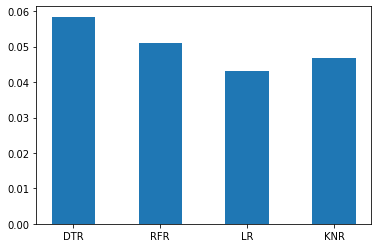

In [21]:
from matplotlib import pyplot
pyplot.bar(r.keys(), r.values(), width=0.5)
pyplot.show()

Model mới có Performance tốt hơn model cũ ( 0.04 so với 0.12 ) 
Do sử dụng nhiều feature hơn nên trong đồ thị LinearRegression sẽ có nhiều điểm được tạo hơn. => dẫn đến độ hiệu quả cao hơn so với model trước chỉ dùng 1 feature.